# Exploratory Data Analysis (EDA)

This notebook contains the exploratory data analysis for the insurance risk analytics project.

## Objectives

1. Data Understanding
2. Data Quality Assessment
3. Univariate Analysis
4. Bivariate/Multivariate Analysis
5. Temporal Trends Analysis
6. Outlier Detection


In [16]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import sys
import os

# Add src to path
sys.path.append(str(Path().resolve().parent))

from src.data.load_data import load_insurance_data, get_data_info
from src.utils.config import RAW_DATA_DIR, REPORTS_DIR

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
%matplotlib inline

# Create figures directory if it doesn't exist
FIGURES_DIR = REPORTS_DIR / "figures"
FIGURES_DIR.mkdir(parents=True, exist_ok=True)
print(f"Figures will be saved to: {FIGURES_DIR}")


Figures will be saved to: /Users/danielmituku/Documents/10Academy/week3/End-to-End-Insurance-Risk-Analytics-Predictive-Modeling/reports/figures


In [17]:
# Load data
df = load_insurance_data()

# Display basic info
print("Dataset Shape:", df.shape)
print("\nColumn Names:")
print(df.columns.tolist())
print("\nData Info:")
df.info()


Loading data from: /Users/danielmituku/Documents/10Academy/week3/End-to-End-Insurance-Risk-Analytics-Predictive-Modeling/data/raw/MachineLearningRating_v3.txt
Loaded 1000098 rows and 52 columns
Dataset Shape: (1000098, 52)

Column Names:
['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth', 'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language', 'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province', 'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode', 'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders', 'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors', 'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser', 'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff', 'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet', 'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm', 'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass', 'StatutoryRi

In [18]:
# Data quality assessment
print("Missing Values:")
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Missing Percentage': missing_pct
})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)
print(missing_df)


Missing Values:
                         Missing Count  Missing Percentage
NumberOfVehiclesInFleet        1000098          100.000000
CrossBorder                     999400           99.930207
CustomValueEstimate             779642           77.956560
Converted                       641901           64.183810
Rebuilt                         641901           64.183810
WrittenOff                      641901           64.183810
NewVehicle                      153295           15.327998
Bank                            145961           14.594670
AccountType                      40232            4.022806
Gender                            9536            0.953507
MaritalStatus                     8259            0.825819
Cylinders                          552            0.055195
cubiccapacity                      552            0.055195
kilowatts                          552            0.055195
NumberOfDoors                      552            0.055195
VehicleIntroDate                   552  

In [19]:
# Calculate Loss Ratio
df['LossRatio'] = df['TotalClaims'] / df['TotalPremium']

# Descriptive statistics
print("Descriptive Statistics for Key Financial Variables:")
financial_cols = ['TotalPremium', 'TotalClaims', 'LossRatio', 'SumInsured', 'CustomValueEstimate']
print(df[financial_cols].describe())


Descriptive Statistics for Key Financial Variables:
       TotalPremium   TotalClaims  LossRatio    SumInsured  \
count  1.000098e+06  1.000098e+06   618614.0  1.000098e+06   
mean   6.190550e+01  6.486119e+01        NaN  6.041727e+05   
std    2.302845e+02  2.384075e+03        NaN  1.508332e+06   
min   -7.825768e+02 -1.200241e+04       -inf  1.000000e-02   
25%    0.000000e+00  0.000000e+00        0.0  5.000000e+03   
50%    2.178333e+00  0.000000e+00        0.0  7.500000e+03   
75%    2.192982e+01  0.000000e+00        0.0  2.500000e+05   
max    6.528260e+04  3.930921e+05        inf  1.263620e+07   

       CustomValueEstimate  
count         2.204560e+05  
mean          2.255311e+05  
std           5.645157e+05  
min           2.000000e+04  
25%           1.350000e+05  
50%           2.200000e+05  
75%           2.800000e+05  
max           2.655000e+07  


/Users/danielmituku/Documents/10Academy/week3/End-to-End-Insurance-Risk-Analytics-Predictive-Modeling/.venv/lib/python3.14/site-packages/numpy/_core/_methods.py:51: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


## 1. Data Structure Review

Review the dtype of each column to confirm if categorical variables, dates, etc., are properly formatted.


In [20]:
# Data Structure Review
print("Data Types:")
print(df.dtypes)
print("\n" + "="*80)
print("\nCategorical Columns (Object type):")
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(categorical_cols)
print(f"\nTotal categorical columns: {len(categorical_cols)}")

print("\n" + "="*80)
print("\nNumerical Columns:")
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(numerical_cols)
print(f"\nTotal numerical columns: {len(numerical_cols)}")

print("\n" + "="*80)
print("\nBoolean Columns:")
bool_cols = df.select_dtypes(include=['bool']).columns.tolist()
print(bool_cols)

# Check TransactionMonth format
print("\n" + "="*80)
print("\nTransactionMonth sample values:")
print(df['TransactionMonth'].head(10))
print(f"\nTransactionMonth dtype: {df['TransactionMonth'].dtype}")

# Convert TransactionMonth to datetime if needed
if df['TransactionMonth'].dtype == 'object':
    df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'], errors='coerce')
    print("\nConverted TransactionMonth to datetime")


Data Types:
UnderwrittenCoverID           int64
PolicyID                      int64
TransactionMonth             object
IsVATRegistered                bool
Citizenship                  object
LegalType                    object
Title                        object
Language                     object
Bank                         object
AccountType                  object
MaritalStatus                object
Gender                       object
Country                      object
Province                     object
PostalCode                    int64
MainCrestaZone               object
SubCrestaZone                object
ItemType                     object
mmcode                      float64
VehicleType                  object
RegistrationYear              int64
make                         object
Model                        object
Cylinders                   float64
cubiccapacity               float64
kilowatts                   float64
bodytype                     object
NumberOfDoors   

## 2. Descriptive Statistics - Variability

Calculate variability (standard deviation, variance, range, IQR) for all numerical features.


In [21]:
# Descriptive Statistics with Variability Measures
def calculate_variability_stats(df, numerical_cols):
    """Calculate comprehensive variability statistics."""
    stats = pd.DataFrame({
        'Mean': df[numerical_cols].mean(),
        'Median': df[numerical_cols].median(),
        'Std': df[numerical_cols].std(),
        'Variance': df[numerical_cols].var(),
        'Min': df[numerical_cols].min(),
        'Max': df[numerical_cols].max(),
        'Range': df[numerical_cols].max() - df[numerical_cols].min(),
        'Q1': df[numerical_cols].quantile(0.25),
        'Q3': df[numerical_cols].quantile(0.75),
        'IQR': df[numerical_cols].quantile(0.75) - df[numerical_cols].quantile(0.25),
        'Skewness': df[numerical_cols].skew(),
        'Kurtosis': df[numerical_cols].kurtosis()
    })
    return stats

# Key numerical columns for analysis
key_numerical = ['TotalPremium', 'TotalClaims', 'SumInsured', 'CustomValueEstimate', 
                 'RegistrationYear', 'cubiccapacity', 'kilowatts', 'Cylinders', 
                 'NumberOfDoors', 'CalculatedPremiumPerTerm']

# Filter to only columns that exist
key_numerical = [col for col in key_numerical if col in df.columns]

variability_stats = calculate_variability_stats(df, key_numerical)
print("Variability Statistics for Key Numerical Features:")
print(variability_stats.round(2))


Variability Statistics for Key Numerical Features:
                               Mean     Median         Std      Variance  \
TotalPremium                  61.91       2.18      230.28  5.303096e+04   
TotalClaims                   64.86       0.00     2384.07  5.683812e+06   
SumInsured                604172.73    7500.00  1508331.84  2.275065e+12   
CustomValueEstimate       225531.13  220000.00   564515.75  3.186780e+11   
RegistrationYear            2010.23    2011.00        3.26  1.064000e+01   
cubiccapacity               2466.74    2694.00      442.80  1.960724e+05   
kilowatts                     97.21     111.00       19.39  3.761000e+02   
Cylinders                      4.05       4.00        0.29  9.000000e-02   
NumberOfDoors                  4.02       4.00        0.47  2.200000e-01   
CalculatedPremiumPerTerm     117.88       8.44      399.70  1.597615e+05   

                               Min          Max        Range         Q1  \
TotalPremium               -782.58   

## 3. Univariate Analysis

### 3.1 Distribution of Numerical Variables (Histograms)


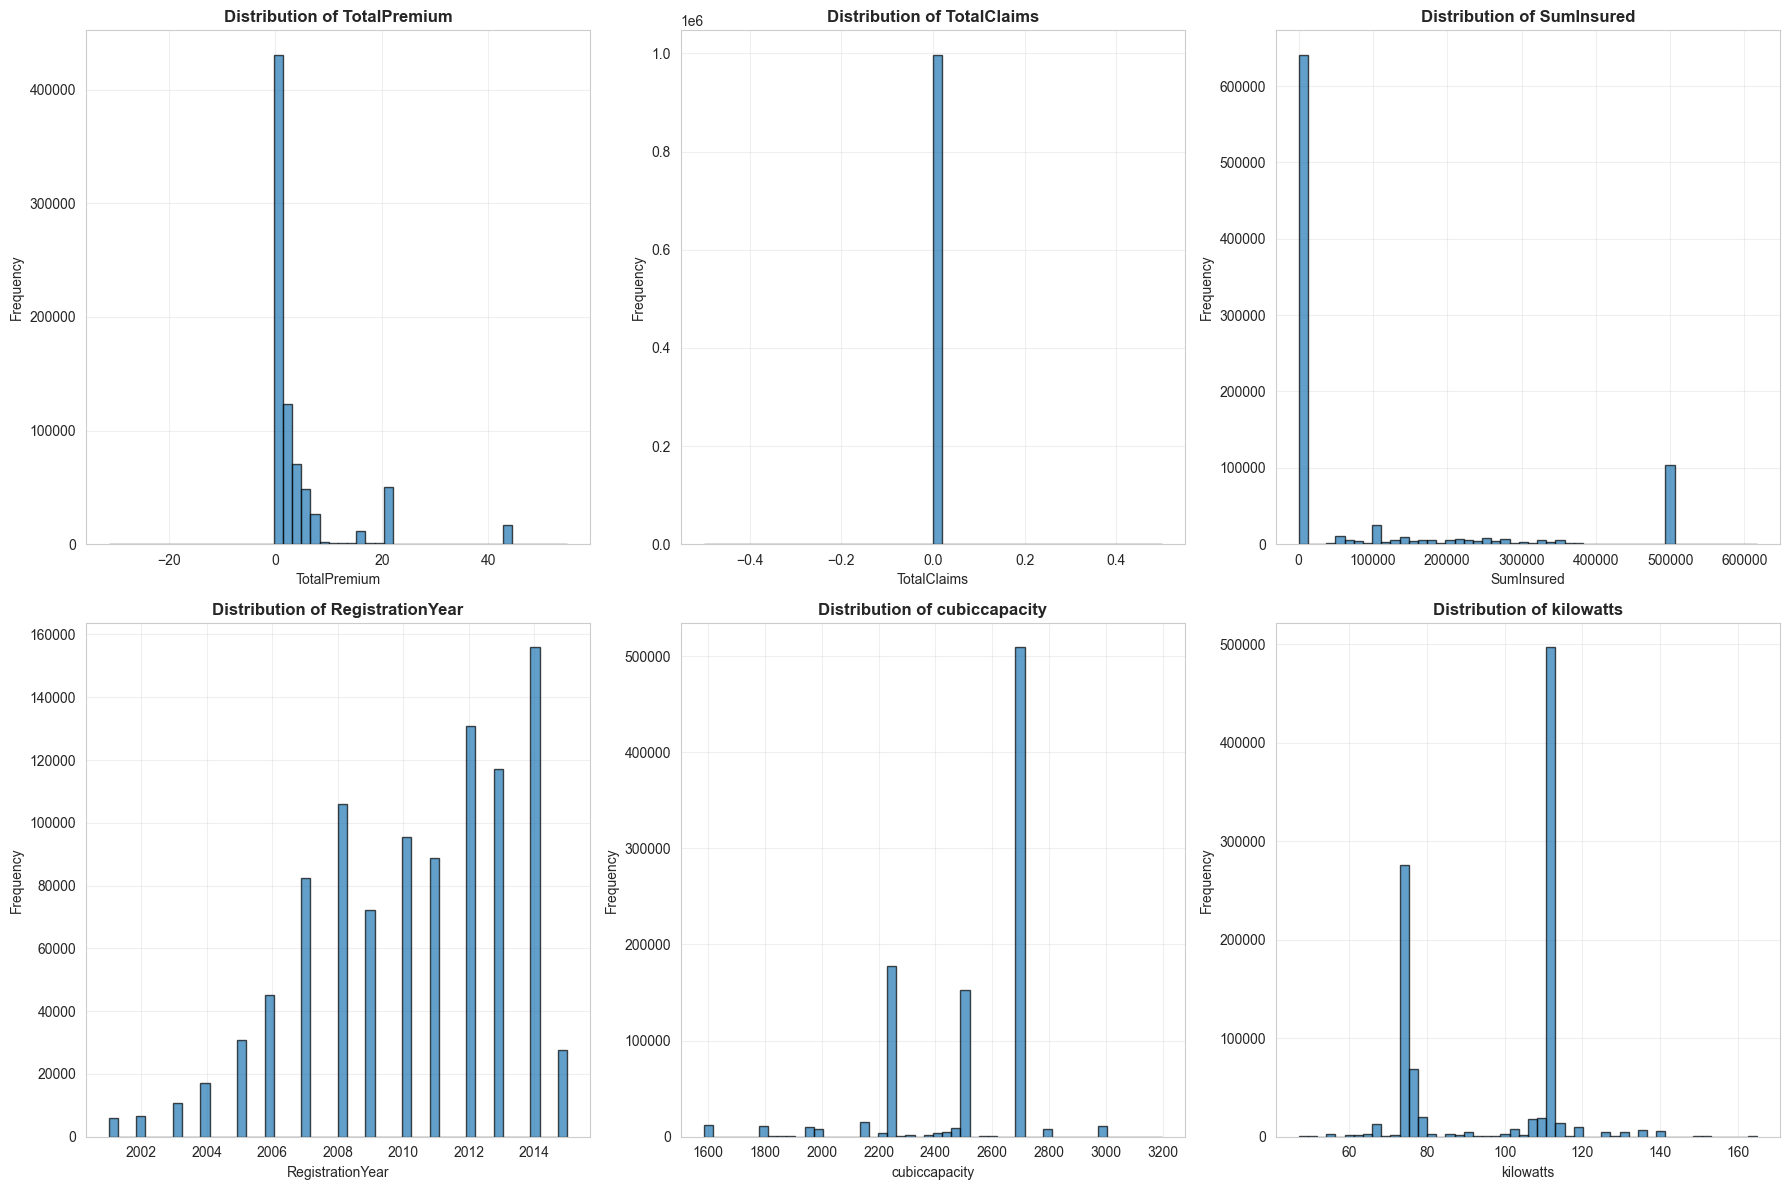

In [22]:
# Histograms for numerical variables
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

key_vars = ['TotalPremium', 'TotalClaims', 'SumInsured', 'RegistrationYear', 
            'cubiccapacity', 'kilowatts']
key_vars = [v for v in key_vars if v in df.columns]

for idx, var in enumerate(key_vars[:6]):
    # Remove outliers for better visualization (using IQR method)
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    data_clean = df[(df[var] >= lower_bound) & (df[var] <= upper_bound)][var]
    
    axes[idx].hist(data_clean.dropna(), bins=50, edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Distribution of {var}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(var)
    axes[idx].set_ylabel('Frequency')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(FIGURES_DIR / '01_histograms_numerical_variables.png', dpi=300, bbox_inches='tight')
plt.show()


### 3.2 Distribution of Categorical Variables (Bar Charts)


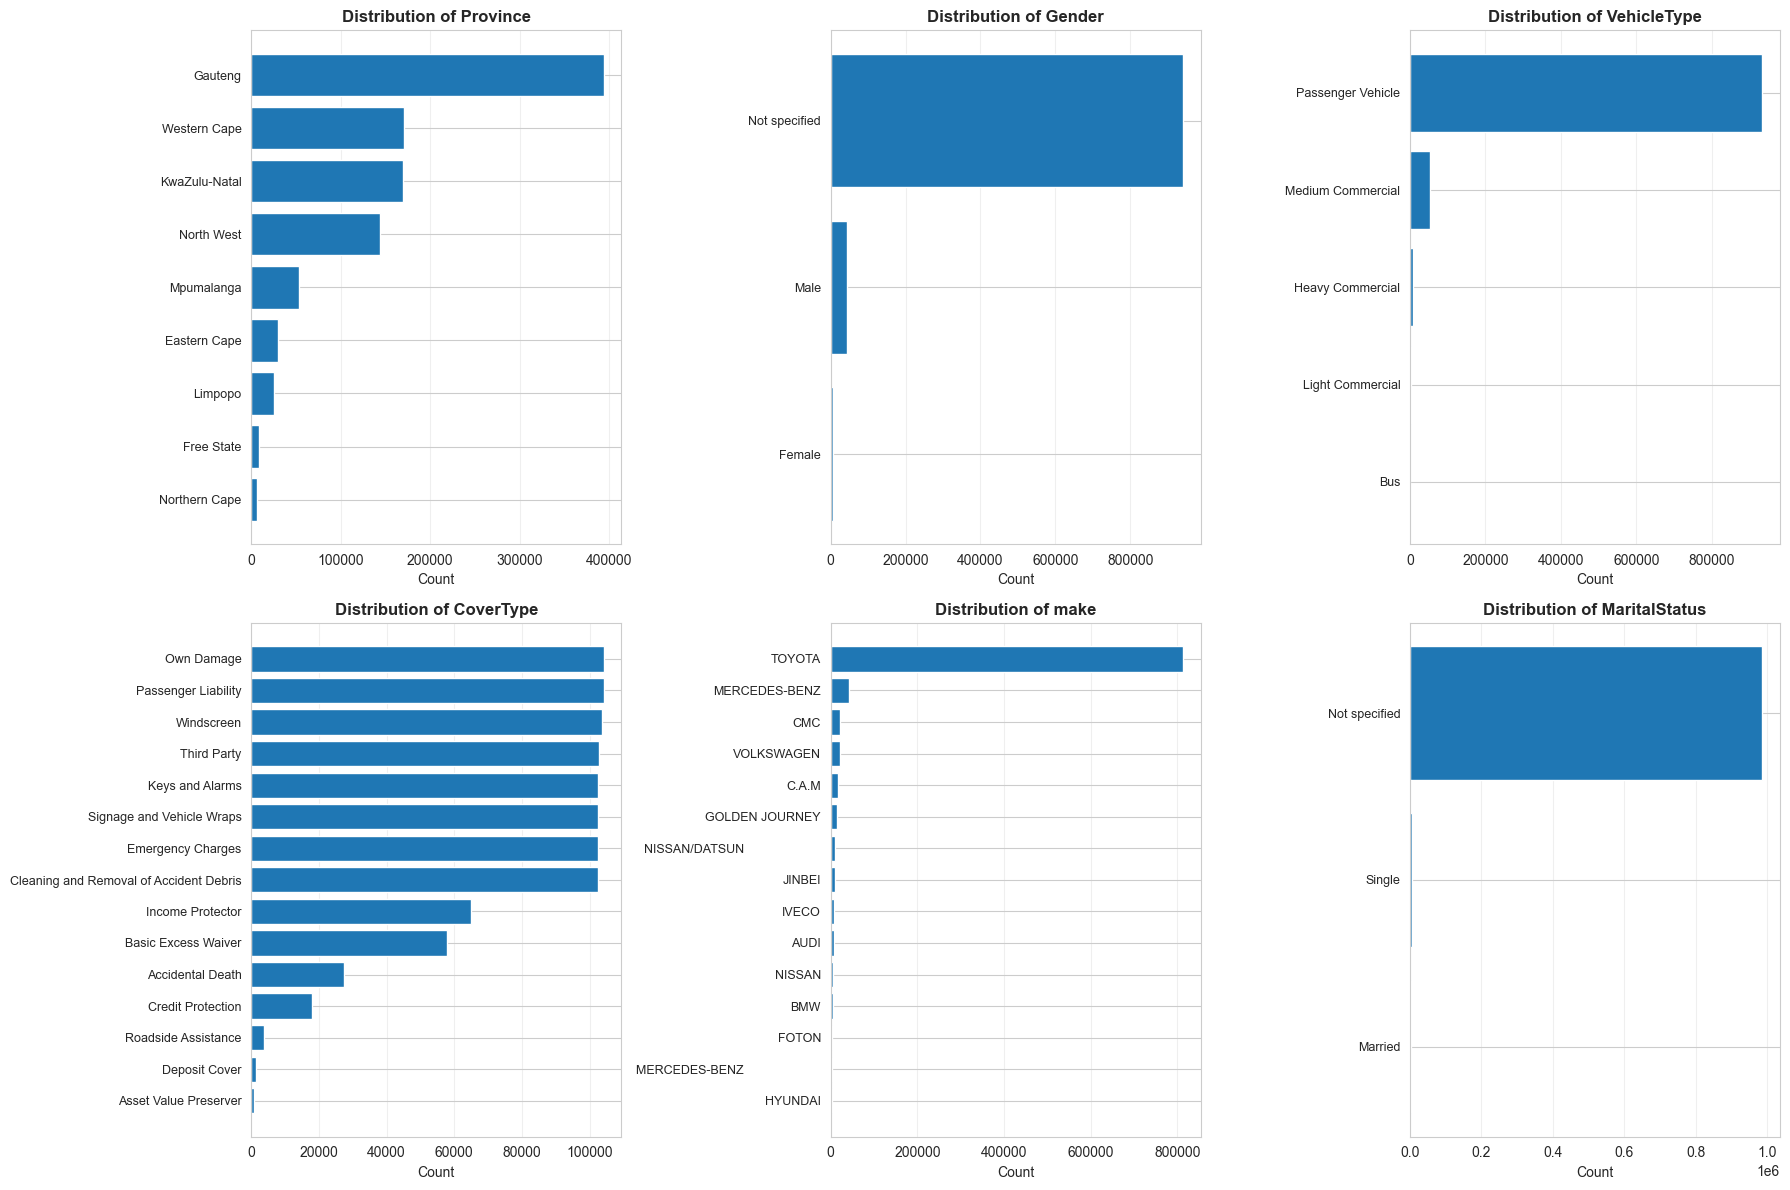

In [23]:
# Bar charts for key categorical variables
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

key_categorical = ['Province', 'Gender', 'VehicleType', 'CoverType', 'make', 'MaritalStatus']
key_categorical = [col for col in key_categorical if col in df.columns]

for idx, var in enumerate(key_categorical[:6]):
    value_counts = df[var].value_counts().head(15)  # Top 15 categories
    axes[idx].barh(range(len(value_counts)), value_counts.values)
    axes[idx].set_yticks(range(len(value_counts)))
    axes[idx].set_yticklabels(value_counts.index, fontsize=9)
    axes[idx].set_title(f'Distribution of {var}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Count')
    axes[idx].invert_yaxis()
    axes[idx].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.savefig(FIGURES_DIR / '02_bar_charts_categorical_variables.png', dpi=300, bbox_inches='tight')
plt.show()


## 4. Bivariate/Multivariate Analysis

### 4.1 Correlation Matrix


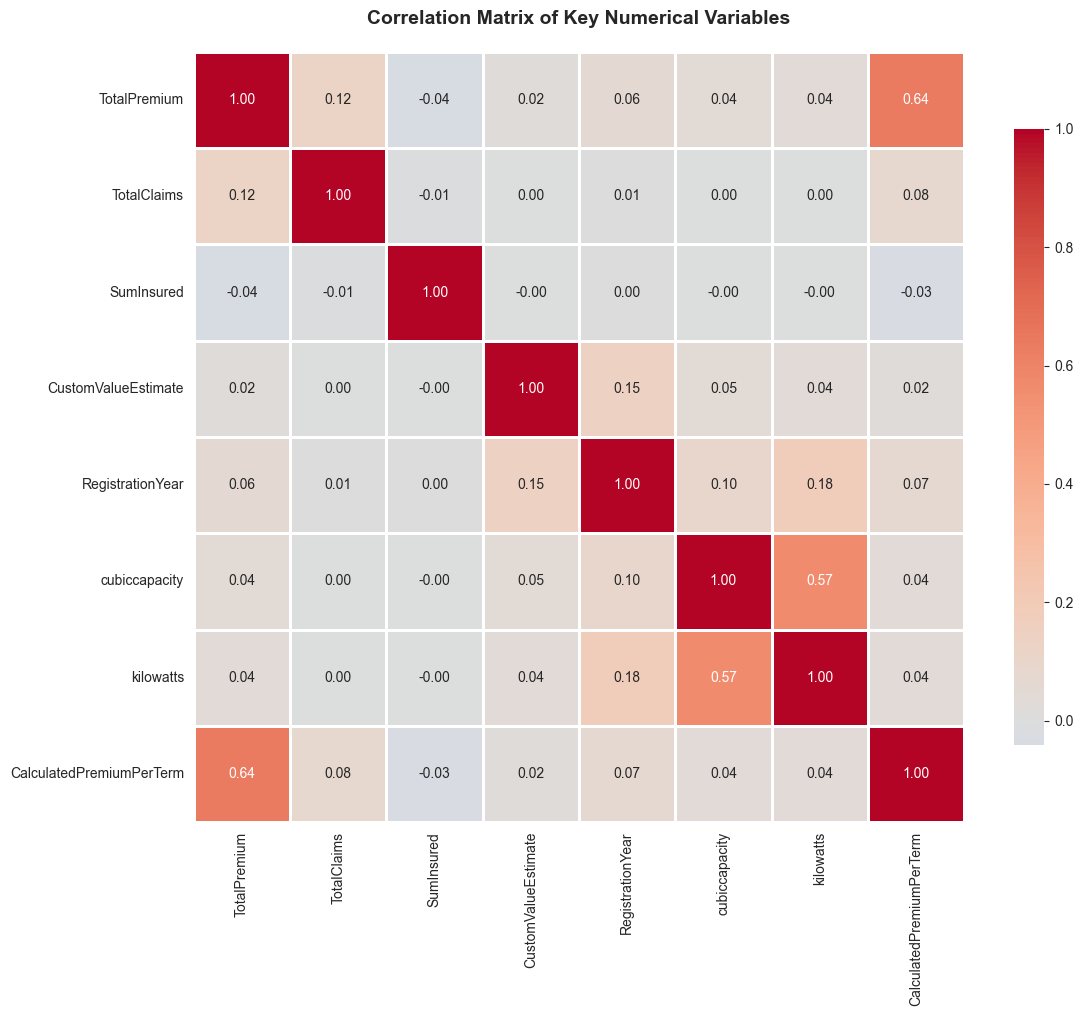

In [24]:
# Correlation matrix for numerical variables
correlation_vars = ['TotalPremium', 'TotalClaims', 'SumInsured', 'CustomValueEstimate',
                   'RegistrationYear', 'cubiccapacity', 'kilowatts', 'CalculatedPremiumPerTerm']
correlation_vars = [v for v in correlation_vars if v in df.columns]

corr_matrix = df[correlation_vars].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Key Numerical Variables', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig(FIGURES_DIR / '03_correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()


### 4.2 Monthly Changes in TotalPremium and TotalClaims by ZipCode (PostalCode)

**REQUIREMENT**: Explore relationships between the monthly changes TotalPremium and TotalClaims as a function of ZipCode.


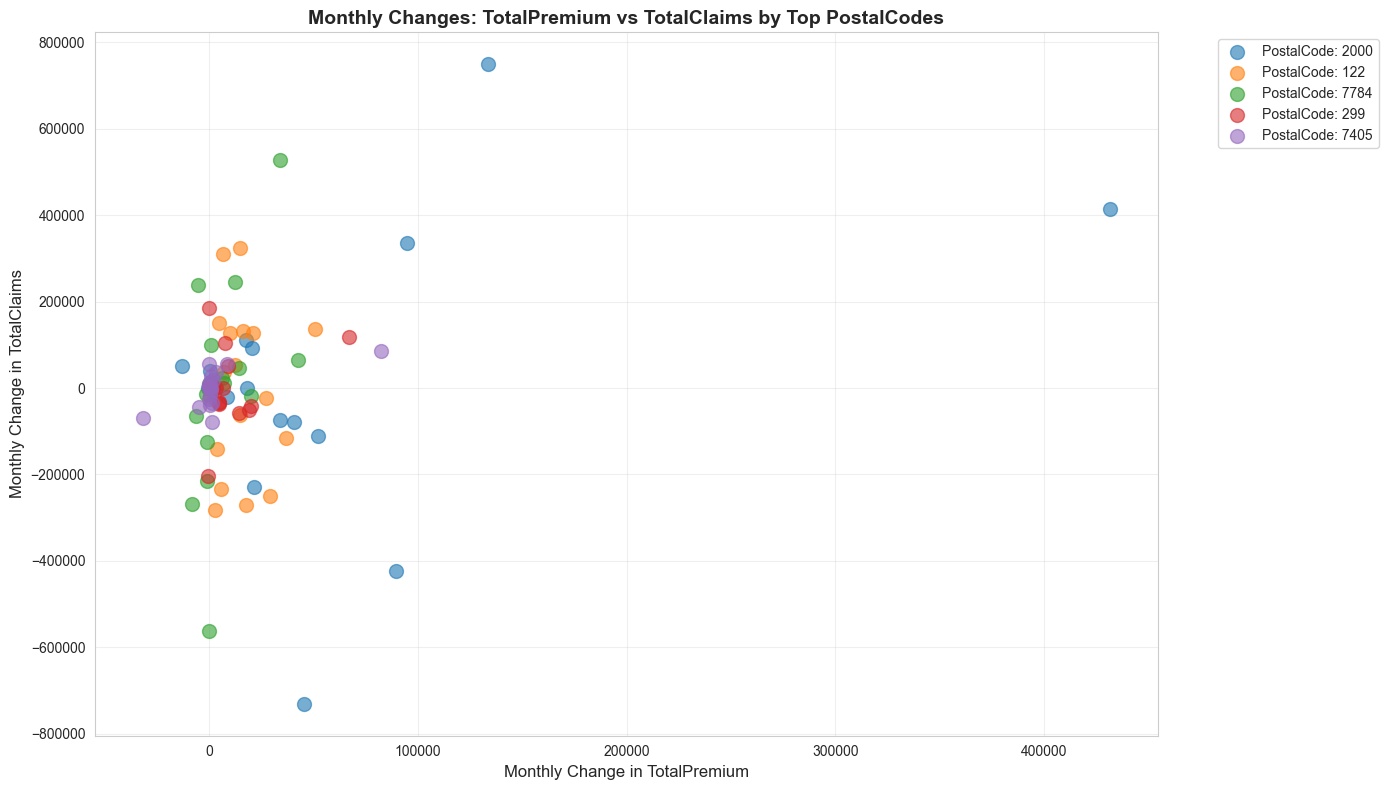


Correlation between Monthly Premium Changes and Claims Changes:
Overall Correlation: 0.1804


In [25]:
# Calculate monthly changes by PostalCode
# First, ensure TransactionMonth is datetime
if not pd.api.types.is_datetime64_any_dtype(df['TransactionMonth']):
    df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'], errors='coerce')

# Create year-month column
df['YearMonth'] = df['TransactionMonth'].dt.to_period('M')

# Calculate monthly aggregates by PostalCode
monthly_by_postal = df.groupby(['PostalCode', 'YearMonth']).agg({
    'TotalPremium': 'sum',
    'TotalClaims': 'sum'
}).reset_index()

# Calculate month-over-month changes
monthly_by_postal = monthly_by_postal.sort_values(['PostalCode', 'YearMonth'])
monthly_by_postal['Premium_Change'] = monthly_by_postal.groupby('PostalCode')['TotalPremium'].diff()
monthly_by_postal['Claims_Change'] = monthly_by_postal.groupby('PostalCode')['TotalClaims'].diff()

# Get top postal codes by volume for visualization
top_postal_codes = df['PostalCode'].value_counts().head(10).index.tolist()
monthly_top_postal = monthly_by_postal[monthly_by_postal['PostalCode'].isin(top_postal_codes)]

# Scatter plot: Monthly changes in Premium vs Claims by PostalCode
plt.figure(figsize=(14, 8))
for postal in top_postal_codes[:5]:  # Top 5 for clarity
    data = monthly_top_postal[monthly_top_postal['PostalCode'] == postal]
    plt.scatter(data['Premium_Change'], data['Claims_Change'], 
               label=f'PostalCode: {postal}', alpha=0.6, s=100)

plt.xlabel('Monthly Change in TotalPremium', fontsize=12)
plt.ylabel('Monthly Change in TotalClaims', fontsize=12)
plt.title('Monthly Changes: TotalPremium vs TotalClaims by Top PostalCodes', 
         fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(FIGURES_DIR / '04_monthly_changes_premium_claims_by_postalcode.png', dpi=300, bbox_inches='tight')
plt.show()

# Correlation of monthly changes
print("\nCorrelation between Monthly Premium Changes and Claims Changes:")
print(f"Overall Correlation: {monthly_by_postal['Premium_Change'].corr(monthly_by_postal['Claims_Change']):.4f}")


## 5. Data Comparison - Trends Over Geography

Compare the change in insurance cover type, premium, auto make, etc. across provinces and zip codes.


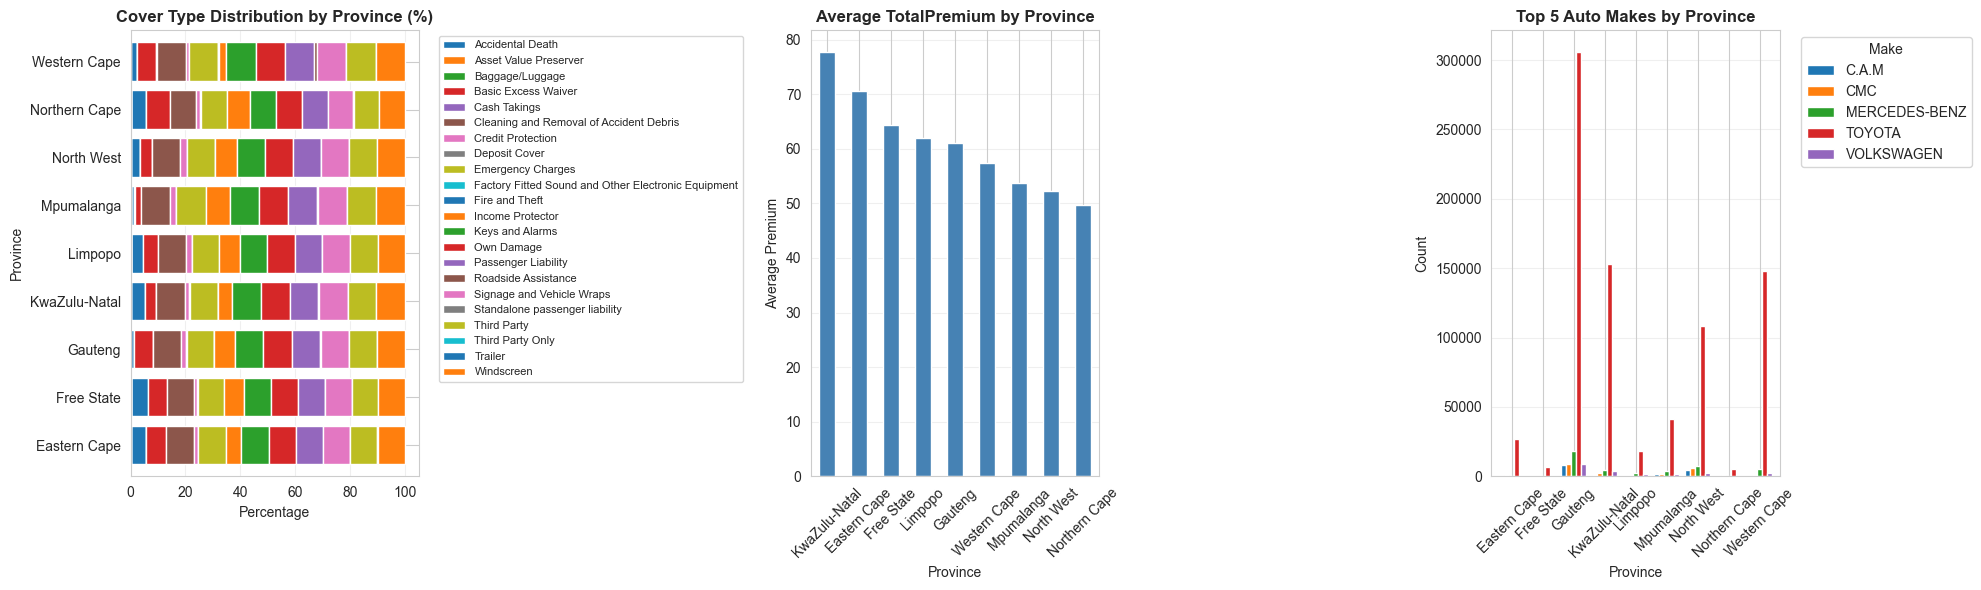

In [26]:
# Geographic Trends Analysis

# 1. Cover Type by Province
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Cover Type distribution by Province
cover_by_province = pd.crosstab(df['Province'], df['CoverType'], normalize='index') * 100
cover_by_province.plot(kind='barh', stacked=True, ax=axes[0], width=0.8)
axes[0].set_title('Cover Type Distribution by Province (%)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Percentage')
axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
axes[0].grid(True, alpha=0.3, axis='x')

# Average Premium by Province
premium_by_province = df.groupby('Province')['TotalPremium'].mean().sort_values(ascending=False)
premium_by_province.plot(kind='bar', ax=axes[1], color='steelblue')
axes[1].set_title('Average TotalPremium by Province', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Province')
axes[1].set_ylabel('Average Premium')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, alpha=0.3, axis='y')

# Top Auto Makes by Province
top_makes = df['make'].value_counts().head(5).index
make_by_province = pd.crosstab(df[df['make'].isin(top_makes)]['Province'], 
                               df[df['make'].isin(top_makes)]['make'])
make_by_province.plot(kind='bar', ax=axes[2], width=0.8)
axes[2].set_title('Top 5 Auto Makes by Province', fontsize=12, fontweight='bold')
axes[2].set_xlabel('Province')
axes[2].set_ylabel('Count')
axes[2].tick_params(axis='x', rotation=45)
axes[2].legend(title='Make', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[2].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig(FIGURES_DIR / '05_geographic_trends_analysis.png', dpi=300, bbox_inches='tight')
plt.show()


## 6. Outlier Detection

Use box plots to detect outliers in numerical data.


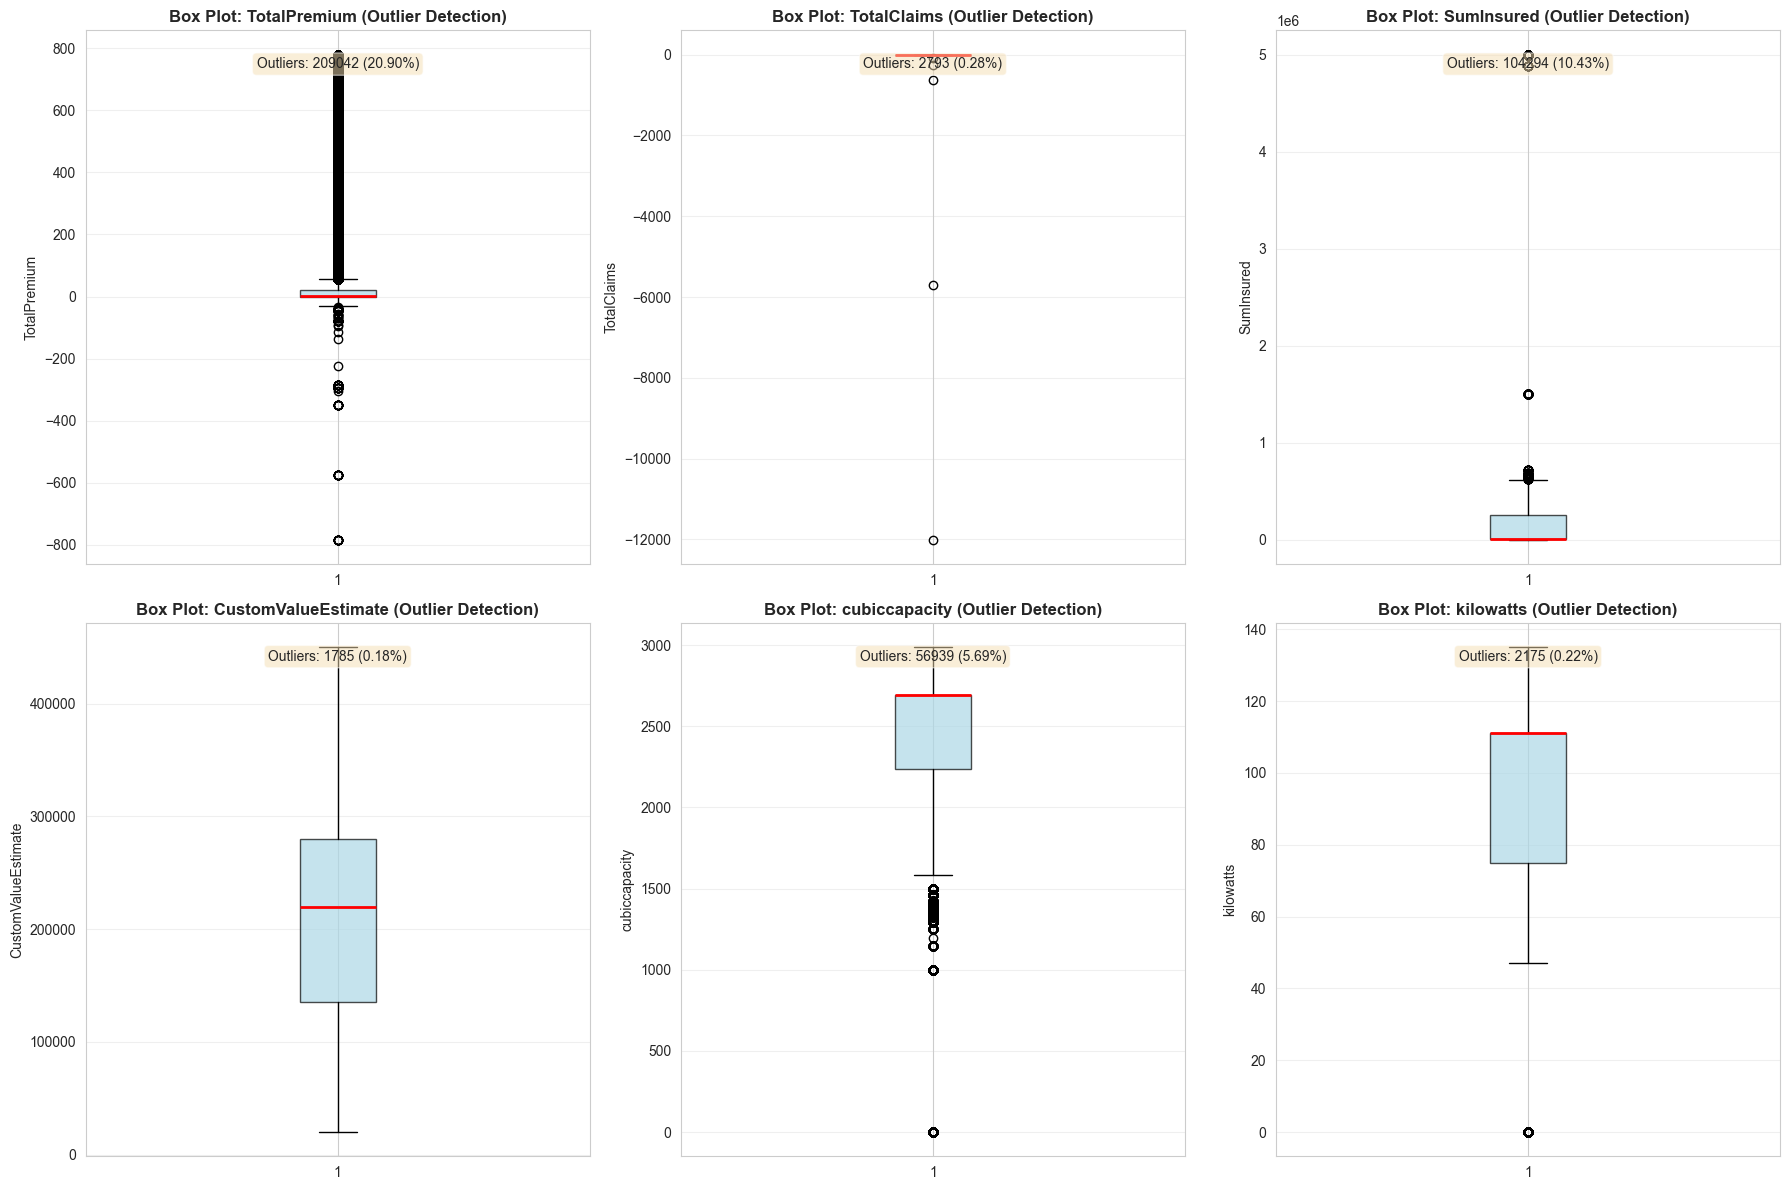


OUTLIER SUMMARY (IQR Method: Q1 - 1.5*IQR to Q3 + 1.5*IQR)

TotalPremium:
  Outliers: 209,042 (20.90%)
  Lower bound: -32.89, Upper bound: 54.82

TotalClaims:
  Outliers: 2,793 (0.28%)
  Lower bound: 0.00, Upper bound: 0.00

SumInsured:
  Outliers: 104,294 (10.43%)
  Lower bound: -362500.00, Upper bound: 617500.00

CustomValueEstimate:
  Outliers: 1,785 (0.18%)
  Lower bound: -82500.00, Upper bound: 497500.00

cubiccapacity:
  Outliers: 56,939 (5.69%)
  Lower bound: 1551.50, Upper bound: 3379.50

kilowatts:
  Outliers: 2,175 (0.22%)
  Lower bound: 21.00, Upper bound: 165.00


In [27]:
# Box plots for outlier detection
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

outlier_vars = ['TotalPremium', 'TotalClaims', 'SumInsured', 'CustomValueEstimate', 
                'cubiccapacity', 'kilowatts']
outlier_vars = [v for v in outlier_vars if v in df.columns]

for idx, var in enumerate(outlier_vars[:6]):
    # Remove extreme outliers for visualization (keep within 99th percentile)
    data_clean = df[df[var] <= df[var].quantile(0.99)][var]
    
    bp = axes[idx].boxplot(data_clean.dropna(), patch_artist=True, 
                           boxprops=dict(facecolor='lightblue', alpha=0.7),
                           medianprops=dict(color='red', linewidth=2))
    axes[idx].set_title(f'Box Plot: {var} (Outlier Detection)', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel(var)
    axes[idx].grid(True, alpha=0.3, axis='y')
    
    # Calculate and display outlier counts
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[var] < lower_bound) | (df[var] > upper_bound)][var]
    axes[idx].text(0.5, 0.95, f'Outliers: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)',
                   transform=axes[idx].transAxes, ha='center', va='top',
                   bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.savefig(FIGURES_DIR / '06_box_plots_outlier_detection.png', dpi=300, bbox_inches='tight')
plt.show()

# Summary of outliers
print("\n" + "="*80)
print("OUTLIER SUMMARY (IQR Method: Q1 - 1.5*IQR to Q3 + 1.5*IQR)")
print("="*80)
for var in outlier_vars:
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[var] < lower_bound) | (df[var] > upper_bound)][var]
    print(f"\n{var}:")
    print(f"  Outliers: {len(outliers):,} ({len(outliers)/len(df)*100:.2f}%)")
    print(f"  Lower bound: {lower_bound:.2f}, Upper bound: {upper_bound:.2f}")


## 7. Creative Visualizations

Produce 3 creative and beautiful plots that capture key insights from EDA.


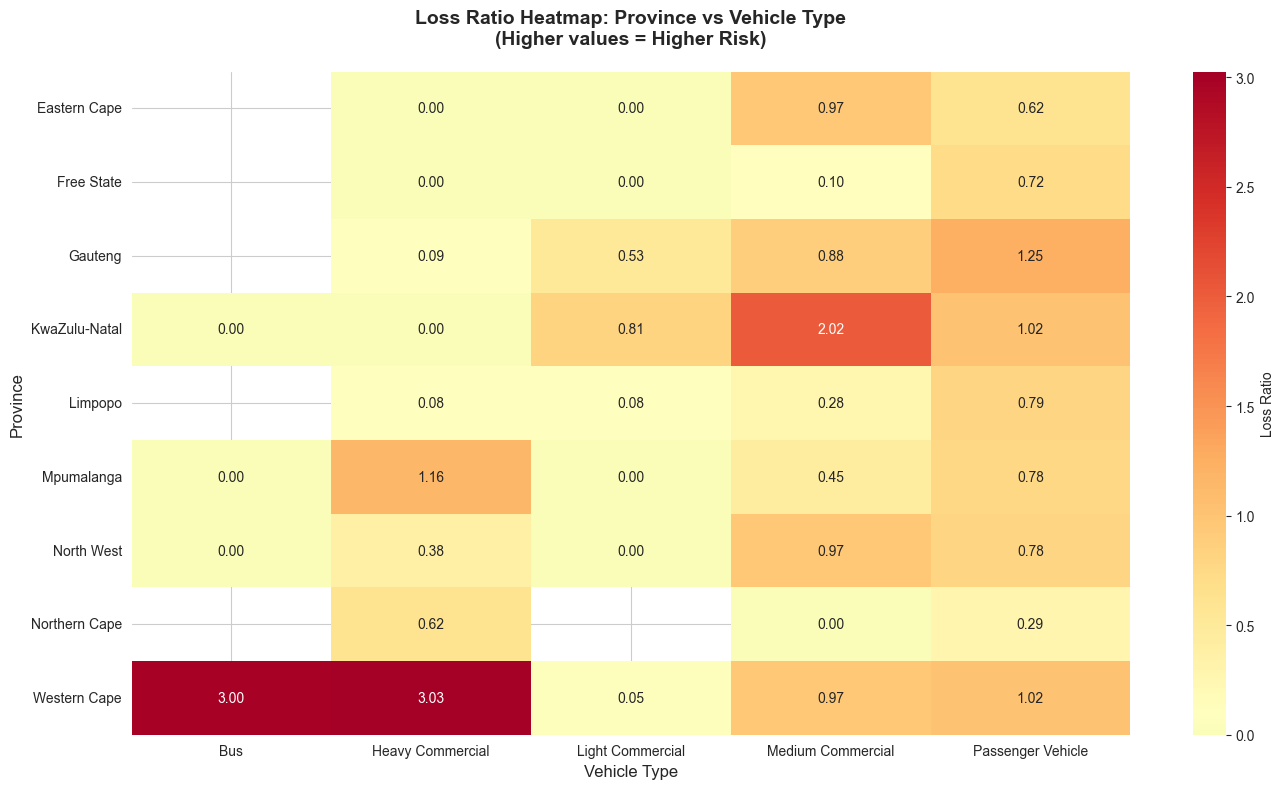

INSIGHT: This visualization reveals which province-vehicle type combinations have the highest risk (loss ratio).


In [28]:
# CREATIVE VISUALIZATION 1: Loss Ratio Heatmap by Province and Vehicle Type
# This shows risk patterns across geography and vehicle categories

loss_ratio_data = df.groupby(['Province', 'VehicleType']).agg({
    'TotalPremium': 'sum',
    'TotalClaims': 'sum'
}).reset_index()
loss_ratio_data['LossRatio'] = loss_ratio_data['TotalClaims'] / loss_ratio_data['TotalPremium']
loss_ratio_data = loss_ratio_data[loss_ratio_data['TotalPremium'] > 0]  # Remove zero premiums

# Pivot for heatmap
loss_ratio_pivot = loss_ratio_data.pivot(index='Province', columns='VehicleType', values='LossRatio')

plt.figure(figsize=(14, 8))
sns.heatmap(loss_ratio_pivot, annot=True, fmt='.2f', cmap='RdYlGn_r', 
            center=loss_ratio_pivot.median().median(), cbar_kws={'label': 'Loss Ratio'})
plt.title('Loss Ratio Heatmap: Province vs Vehicle Type\n(Higher values = Higher Risk)', 
         fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Vehicle Type', fontsize=12)
plt.ylabel('Province', fontsize=12)
plt.tight_layout()
plt.savefig(FIGURES_DIR / '07_creative_1_loss_ratio_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()
print("INSIGHT: This visualization reveals which province-vehicle type combinations have the highest risk (loss ratio).")


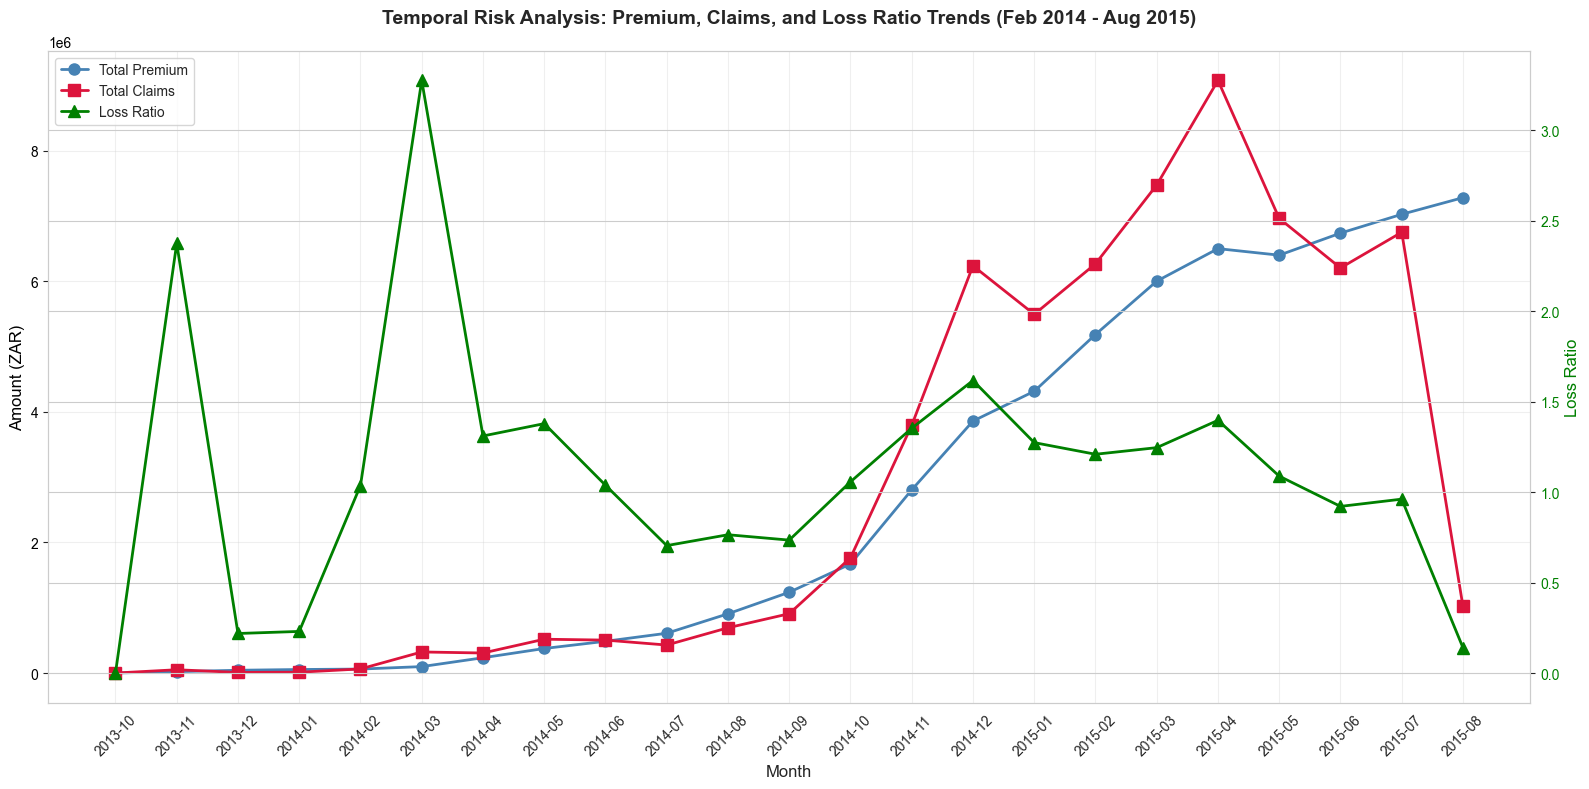

INSIGHT: This shows how premium, claims, and risk (loss ratio) evolved over time, revealing seasonal patterns and trends.


In [29]:
# CREATIVE VISUALIZATION 2: Temporal Risk Trend with Premium and Claims Overlay
# Shows how risk patterns evolved over the 18-month period

monthly_agg = df.groupby('YearMonth').agg({
    'TotalPremium': 'sum',
    'TotalClaims': 'sum',
    'PolicyID': 'nunique'
}).reset_index()
monthly_agg['LossRatio'] = monthly_agg['TotalClaims'] / monthly_agg['TotalPremium']
monthly_agg['YearMonth_str'] = monthly_agg['YearMonth'].astype(str)

fig, ax1 = plt.subplots(figsize=(16, 8))

# Dual y-axis plot
ax1.set_xlabel('Month', fontsize=12)
ax1.set_ylabel('Amount (ZAR)', fontsize=12, color='black')
line1 = ax1.plot(monthly_agg['YearMonth_str'], monthly_agg['TotalPremium'], 
                'o-', color='steelblue', linewidth=2, markersize=8, label='Total Premium')
line2 = ax1.plot(monthly_agg['YearMonth_str'], monthly_agg['TotalClaims'], 
                's-', color='crimson', linewidth=2, markersize=8, label='Total Claims')
ax1.tick_params(axis='y', labelcolor='black')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, alpha=0.3)

ax2 = ax1.twinx()
ax2.set_ylabel('Loss Ratio', fontsize=12, color='green')
line3 = ax2.plot(monthly_agg['YearMonth_str'], monthly_agg['LossRatio'], 
                '^-', color='green', linewidth=2, markersize=8, label='Loss Ratio')
ax2.tick_params(axis='y', labelcolor='green')

# Combine legends
lines = line1 + line2 + line3
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left', fontsize=10)

plt.title('Temporal Risk Analysis: Premium, Claims, and Loss Ratio Trends (Feb 2014 - Aug 2015)', 
         fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig(FIGURES_DIR / '08_creative_2_temporal_risk_trend.png', dpi=300, bbox_inches='tight')
plt.show()
print("INSIGHT: This shows how premium, claims, and risk (loss ratio) evolved over time, revealing seasonal patterns and trends.")


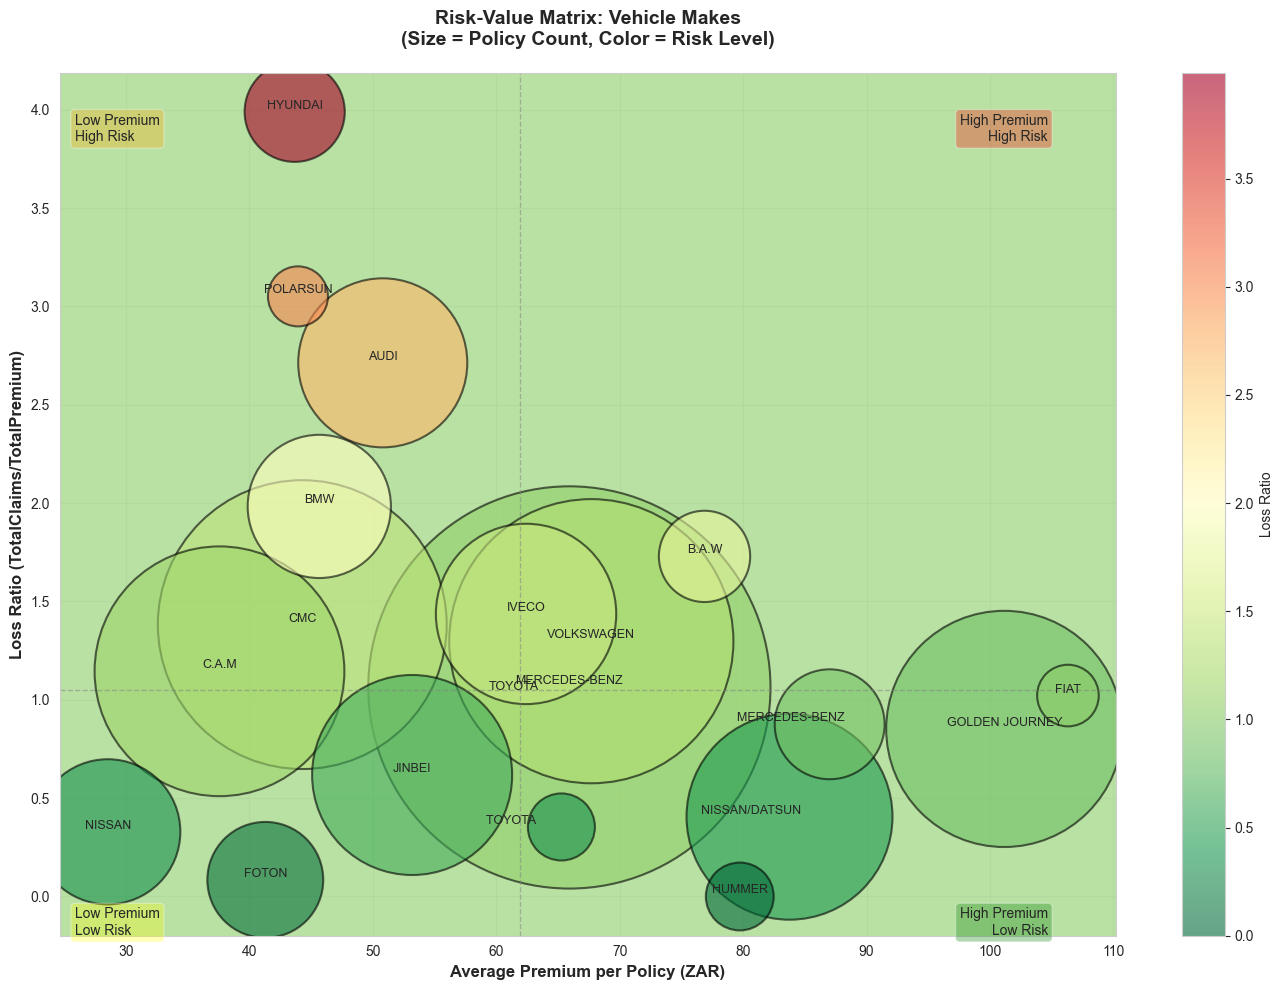

INSIGHT: This matrix identifies vehicle makes that are:
  - High Premium + Low Risk: Premium opportunities (top-right quadrant)
  - Low Premium + High Risk: Need premium adjustment (bottom-left quadrant)
  - High Premium + High Risk: Review pricing strategy (top-left quadrant)


In [30]:
# CREATIVE VISUALIZATION 3: Risk-Value Matrix: Premium vs Claims by Vehicle Make
# Identifies high-value, low-risk opportunities and high-risk segments

make_analysis = df.groupby('make').agg({
    'TotalPremium': ['sum', 'mean', 'count'],
    'TotalClaims': ['sum', 'mean']
}).reset_index()
make_analysis.columns = ['Make', 'TotalPremium_Sum', 'AvgPremium', 'PolicyCount', 
                        'TotalClaims_Sum', 'AvgClaims']
make_analysis['LossRatio'] = make_analysis['TotalClaims_Sum'] / make_analysis['TotalPremium_Sum']
make_analysis = make_analysis[make_analysis['PolicyCount'] >= 100]  # Filter for significant makes
make_analysis = make_analysis.sort_values('PolicyCount', ascending=False).head(20)

# Create risk categories
make_analysis['RiskCategory'] = pd.cut(make_analysis['LossRatio'], 
                                       bins=[0, 0.5, 0.8, 1.2, float('inf')],
                                       labels=['Low Risk', 'Medium Risk', 'High Risk', 'Very High Risk'])

fig, ax = plt.subplots(figsize=(14, 10))

# Scatter plot with size and color
scatter = ax.scatter(make_analysis['AvgPremium'], make_analysis['LossRatio'],
                    s=make_analysis['PolicyCount']*2,  # Size by policy count
                    c=make_analysis['LossRatio'], cmap='RdYlGn_r',
                    alpha=0.6, edgecolors='black', linewidth=1.5)

# Add labels for top makes
for idx, row in make_analysis.iterrows():
    ax.annotate(row['Make'], (row['AvgPremium'], row['LossRatio']),
               fontsize=9, ha='center', va='bottom')

ax.set_xlabel('Average Premium per Policy (ZAR)', fontsize=12, fontweight='bold')
ax.set_ylabel('Loss Ratio (TotalClaims/TotalPremium)', fontsize=12, fontweight='bold')
ax.set_title('Risk-Value Matrix: Vehicle Makes\n(Size = Policy Count, Color = Risk Level)', 
            fontsize=14, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3)

# Add quadrant lines
median_premium = make_analysis['AvgPremium'].median()
median_loss = make_analysis['LossRatio'].median()
ax.axvline(median_premium, color='gray', linestyle='--', alpha=0.5, linewidth=1)
ax.axhline(median_loss, color='gray', linestyle='--', alpha=0.5, linewidth=1)

# Add quadrant labels
ax.text(ax.get_xlim()[1]*0.95, ax.get_ylim()[1]*0.95, 'High Premium\nHigh Risk', 
       ha='right', va='top', fontsize=10, bbox=dict(boxstyle='round', facecolor='red', alpha=0.3))
ax.text(ax.get_xlim()[0]*1.05, ax.get_ylim()[1]*0.95, 'Low Premium\nHigh Risk', 
       ha='left', va='top', fontsize=10, bbox=dict(boxstyle='round', facecolor='orange', alpha=0.3))
ax.text(ax.get_xlim()[1]*0.95, ax.get_ylim()[0]*1.05, 'High Premium\nLow Risk', 
       ha='right', va='bottom', fontsize=10, bbox=dict(boxstyle='round', facecolor='green', alpha=0.3))
ax.text(ax.get_xlim()[0]*1.05, ax.get_ylim()[0]*1.05, 'Low Premium\nLow Risk', 
       ha='left', va='bottom', fontsize=10, bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.3))

plt.colorbar(scatter, label='Loss Ratio', ax=ax)
plt.tight_layout()
plt.savefig(FIGURES_DIR / '09_creative_3_risk_value_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("INSIGHT: This matrix identifies vehicle makes that are:")
print("  - High Premium + Low Risk: Premium opportunities (top-right quadrant)")
print("  - Low Premium + High Risk: Need premium adjustment (bottom-left quadrant)")
print("  - High Premium + High Risk: Review pricing strategy (top-left quadrant)")
